# Bayesian Inference from Scratch

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

## Dataset

In [2]:
df = pd.read_csv('./diabetes_dataset.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


## EDA

In [4]:

for i in df:
  print('---------------------------------------')
  print("The unique values for", i)
  print(df[i].unique())
  print('---------------------------------------')

---------------------------------------
The unique values for Age
[40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
---------------------------------------
---------------------------------------
The unique values for Gender
['Male' 'Female']
---------------------------------------
---------------------------------------
The unique values for Polyuria
['No' 'Yes']
---------------------------------------
---------------------------------------
The unique values for Polydipsia
['Yes' 'No']
---------------------------------------
---------------------------------------
The unique values for sudden weight loss
['No' 'Yes']
---------------------------------------
---------------------------------------
The unique values for weakness
['Yes' 'No']
---------------------------------------
---------------------------------------
The unique values for Polyphagia
['No' 'Yes']
----------------

In [5]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [6]:
columns_to_replace = ['Polyuria', 'Polydipsia', 'sudden weight loss',
                       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
                       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
                       'muscle stiffness', 'Alopecia', 'Obesity']

df_d = df.copy()
df_d[columns_to_replace] = df_d[columns_to_replace].replace({'Yes': 1, 'No': 0})

In [7]:
df_d['Gender'] = df_d['Gender'].replace({'Male':1, 'Female':0})

In [8]:
df_d['class'] = df_d['class'].replace({'Positive':1, 'Negative':0})

In [9]:
df_d.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


<Axes: >

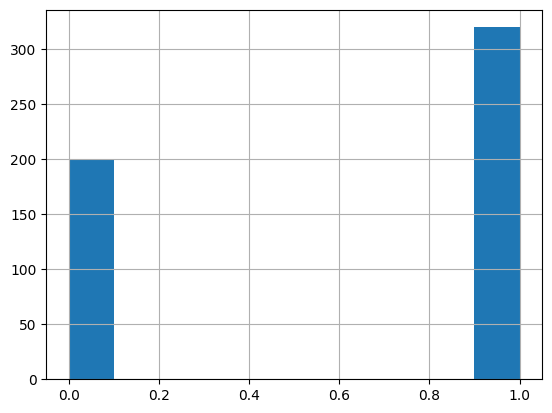

In [10]:
df_d['class'].hist()

<Axes: >

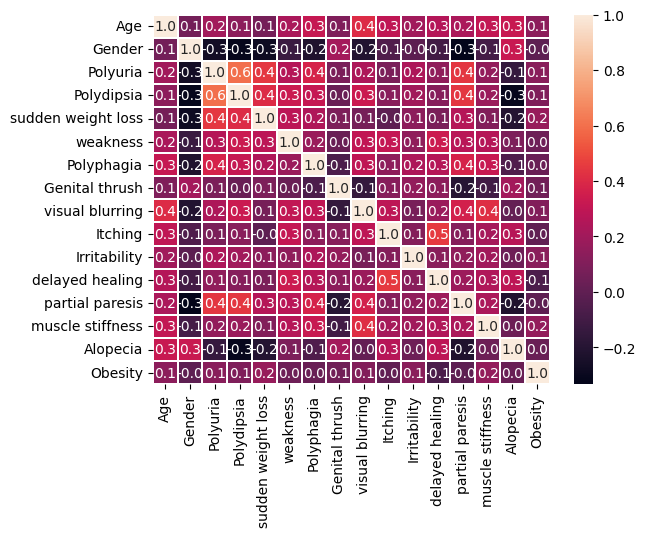

In [11]:
corrR = df_d.iloc[:,:-1].corr(method="pearson")
# cmap = sns.diverging_palette(250,354,80,60, center='dark', as_cmap=True)
sns.heatmap(corrR, linewidths=0.3, annot=True, fmt=".1f")

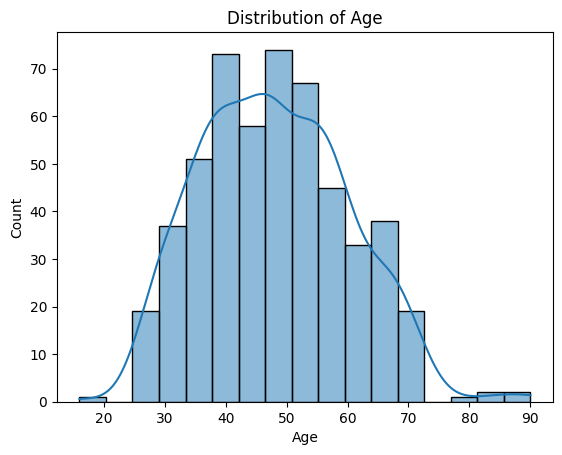

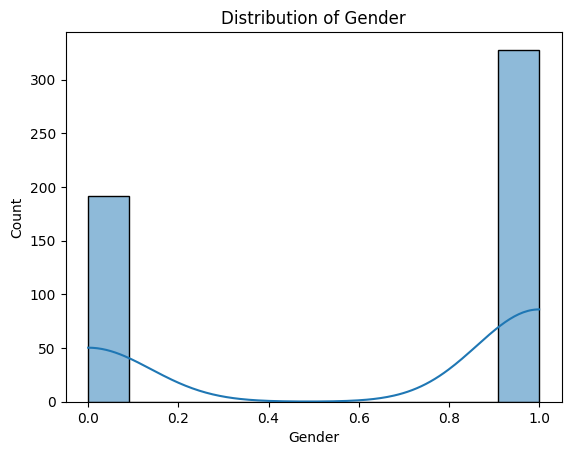

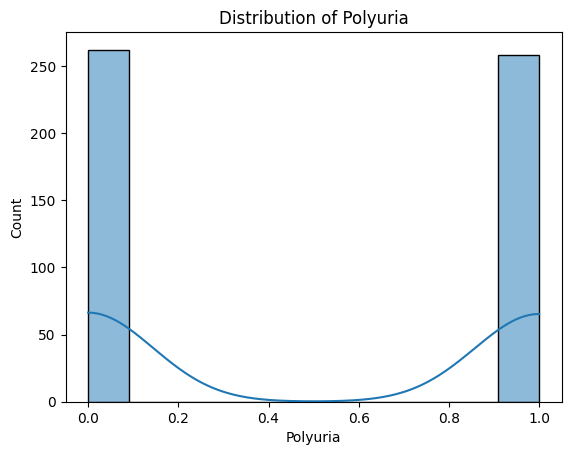

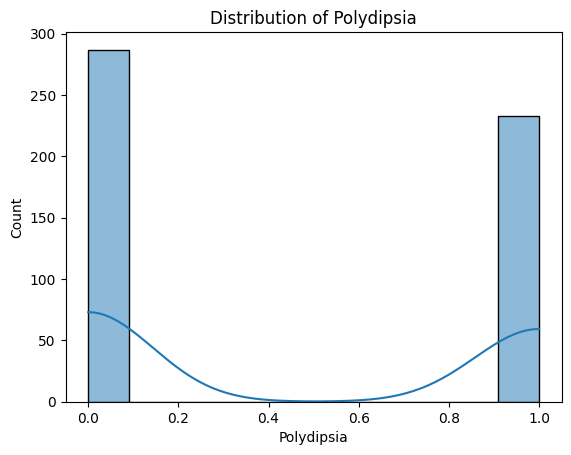

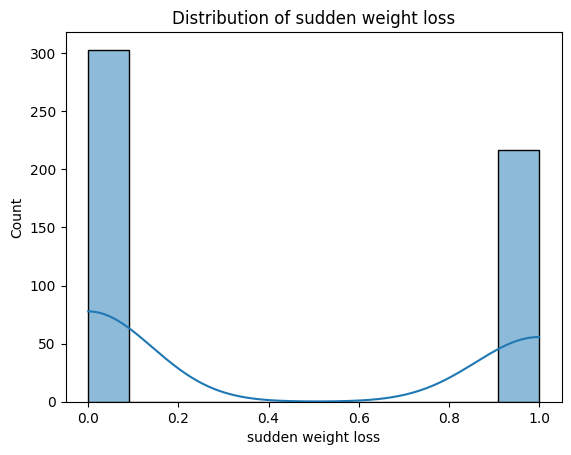

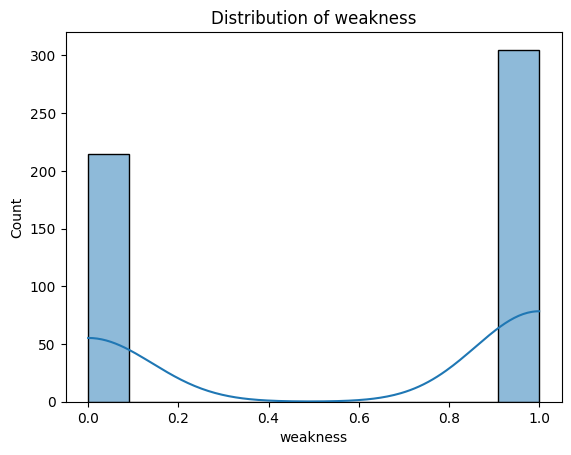

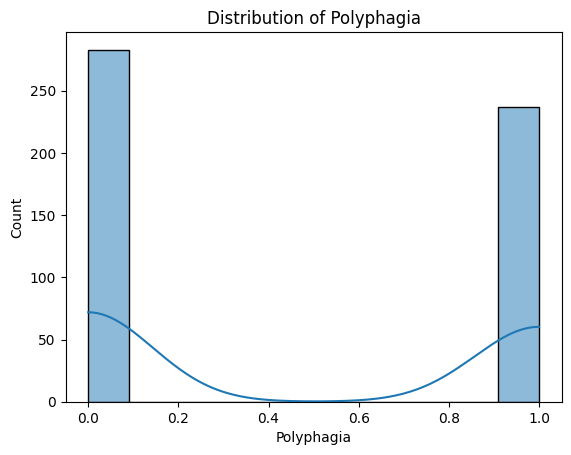

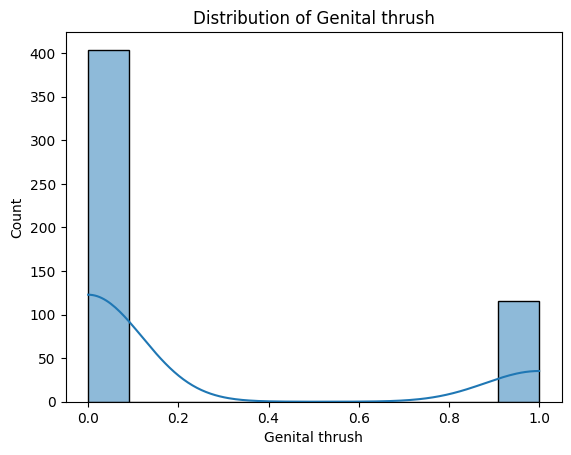

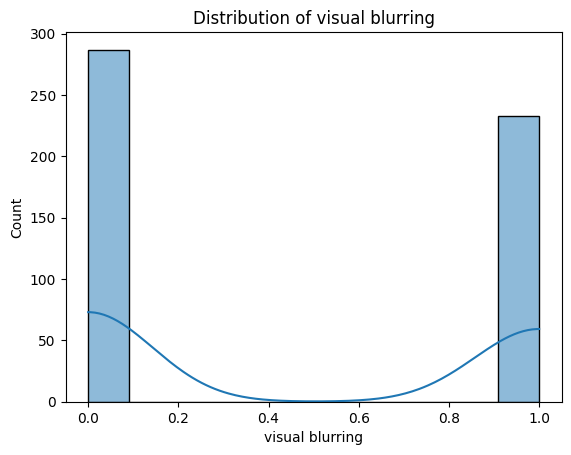

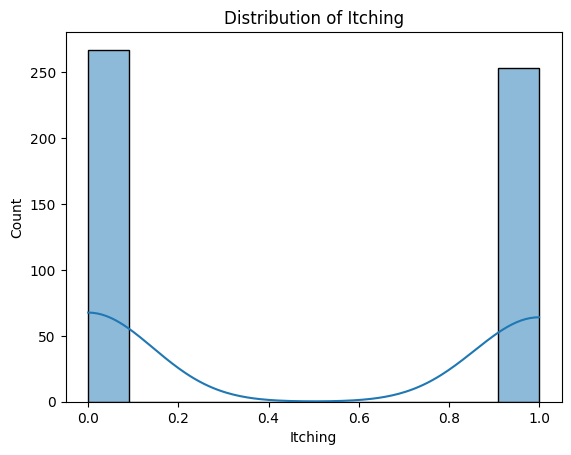

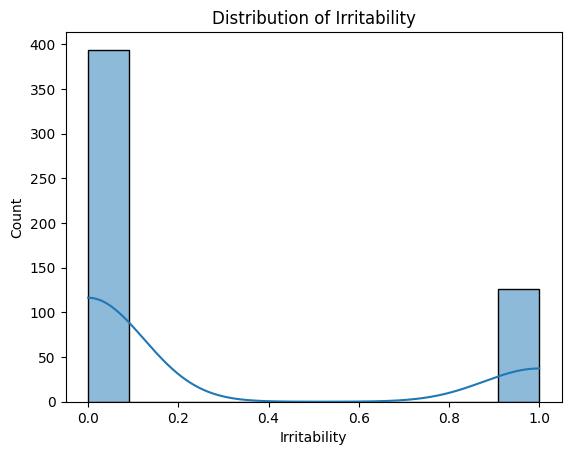

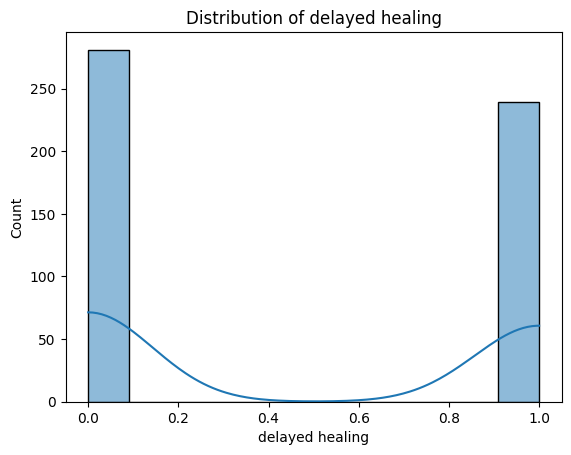

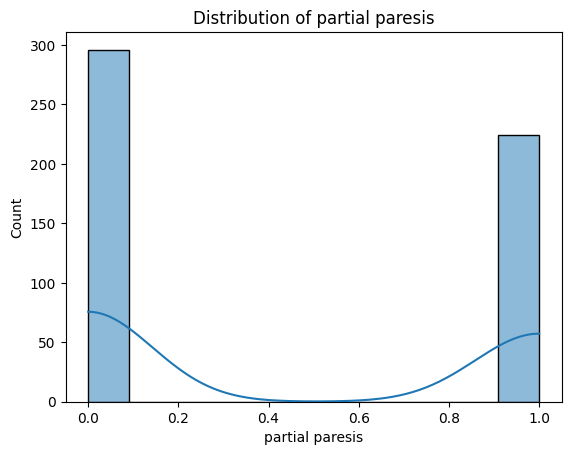

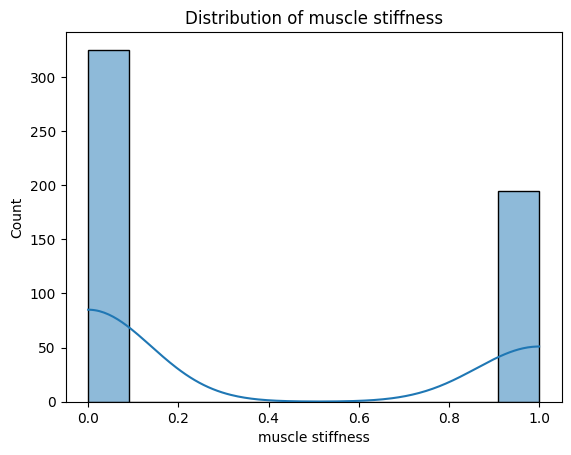

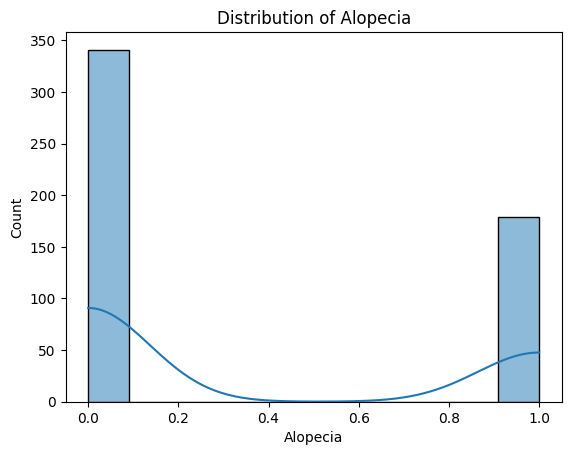

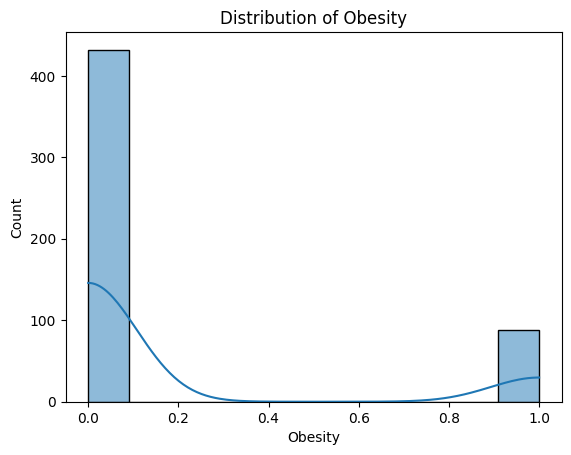

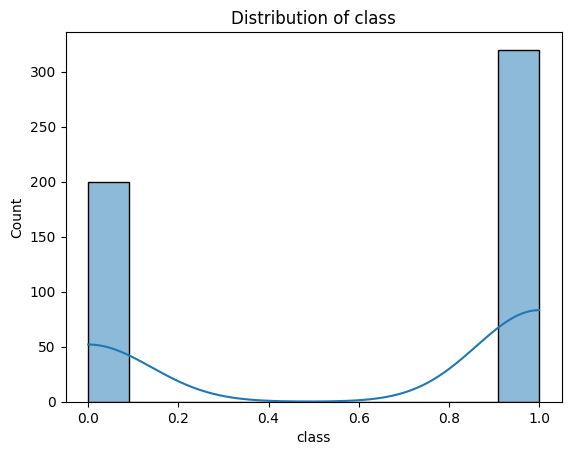

In [12]:
for i in df_d:
    sns.histplot(df_d[i], kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

## Calculating Prior

In [13]:
#test code
testClasses = sorted(list(df_d['Alopecia'].unique()))
print(testClasses)
prior_test = []
for i in testClasses:
    prior_test.append(len(df_d[df_d['Alopecia']==i])/len(df_d))
print(prior_test)
print(df_d['Alopecia'].mean())
print(df_d['Alopecia'].std())

[0, 1]
[0.6557692307692308, 0.34423076923076923]
0.34423076923076923
0.4755742747103406


In [14]:
def calcPrior(data, Y, uniqueValues):
    uClasses = uniqueValues
    prior = []
    for i in uClasses:
        prior.append(len(data[data[Y]==i])/len(data))
    return prior

## Calculate Bayesian Inference

Gaussian Likelihhod can be given as follows:


![Gaussian Likelihood](GaussianDist_Likelihood.png)

In [15]:
# def calcLikelikhood_Gaussian(data, featureName, featureVal, Y, label):
#     data = data[data[Y]==label]
#     meanF, stdF = data[featureName].mean(), data[featureName].std()
#     #from the formula above in the image
#     p_x_Class = (1/(np.sqrt(2 * np.pi) * stdF)) * np.exp(-((featureVal - meanF)**2)/(2 * (stdF**2)))
#     return p_x_Class

In [16]:
# def calcLikelihoodCat(data, feat_name, feat_val, Y, label):
#     data = data[data[Y]==label]
#     p_x_y = len(data[data[feat_name]==feat_val]) / len(data)
#     return p_x_y

In [17]:
def calcLikelikhood(data, featureName, featureVal, Y, label, user_choice, alpha=1.0):
    if user_choice == 1:
        
        data = data[data[Y]==label]
        meanF, stdF = data[featureName].mean(), data[featureName].std()
        #from the formula above in the image
        p_x_Class = (1/(np.sqrt(2 * np.pi) * stdF)) * np.exp(-((featureVal - meanF)**2)/(2 * (stdF**2)))
        return p_x_Class
    
    else:
        data = data[data[Y] == label]
        total_count = len(data)
        feature_count = len(data[data[featureName] == featureVal])
        # using Laplacian smoothing to handle the issues with zero probablities
        # when used the fucntion calcLikelihoodCat, found this issue of zero probablities
        likelihood = (feature_count + alpha) / (total_count + len(data[featureName].unique()) * alpha)
        return likelihood

Now the final part of the calulation includes finding the likelihood of the feature variables given the target variable.

In mathematical terms, it can be explained as:
P(X|Y), which further can be expaned based on our data that has 16 features (columns).

So in our case, the likelihood can be written as:
* **P(x1|Y)P(x2|Y)P(x3|Y)...P(x16|Y)**

In [18]:
def naiveBayes(data, X, Y, uniqueValues, user_choice):
    features = list(data.columns)[:-1]
    prior = calcPrior(data, Y, uniqueValues)
    YPred = []
    for x in X:
        labels = uniqueValues
        likelihood = [1]*len(labels) #basic assumption that each label has a likelihood of happening as equally likely
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calcLikelikhood(data, features[i], x[i], Y, labels[j], user_choice)
        # nested loop used above to get the likelihood for each feature and label for that particluar feature
        # calculate posterior probability (numerator only)
        postProb = [1]*len(labels)
        for j in range(len(labels)):
            postProb[j] = likelihood[j] * prior[j]

        YPred.append(np.argmax(postProb))
    return np.array(YPred)

## Testing the Model

In [19]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_d, test_size=.25, random_state=34)

X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
uniqueValues = sorted(list(train['class'].unique()))

while True:
    try:
        user_choice = int(input("Enter 1 or 2: "))
        
        if user_choice in [1, 2]:
            break
        else:
            print("Invalid input. Please enter 1 or 2.")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

if user_choice == 1:
    model = "Gaussian based Naive Bayes"
    Y_pred = naiveBayes(train, X=X_test, Y="class", uniqueValues=uniqueValues, user_choice=user_choice)
else:
    model = "Basic Naive Bayes"
    bin_edges = [0, 30, 60, float('inf')]
    bin_labels = [0, 1, 2]
    train["Age"] = pd.cut(train["Age"], bins=bin_edges, labels=bin_labels, right=False)
    Y_pred = naiveBayes(train, X=X_test, Y="class", uniqueValues=uniqueValues, user_choice=user_choice)



## Results

In [22]:
from sklearn.metrics import confusion_matrix, f1_score
confusion_matrix = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)
F1Score = (2 * (Precision * Recall))/(Precision + Recall)
accuracy = (TP+TN)/(TP+TN+FP+FN)
print('Precision = ',Precision)
print('Recall = ',Recall)
print('F1Score = ',round(F1Score,2))
print('Accuracy = ',round(accuracy,2))

[[48  2]
 [12 68]]
Precision =  0.9714285714285714
Recall =  0.85
F1Score =  0.91
Accuracy =  0.89


In [21]:
from IPython.display import HTML

result_text = f"<strong>The {model} model exhibits excellent performance:</strong><br><br>"
result_text += f"- <strong>Precision:</strong> {Precision:.2f}<br>"
result_text += f"- <strong>Recall:</strong> {Recall:.2f}<br>"
result_text += f"- <strong>F1 Score:</strong> {F1Score:.2f}<br><br>"

# Overall Accuracy
result_text += f"The overall <strong>accuracy</strong> of {accuracy:.2%} reflects a strong level of correct predictions across both "
result_text += "positive and negative instances."

HTML(result_text)
